<a href="https://colab.research.google.com/github/Ambujatwork/Research-on-Kashmir-Rain-Data/blob/main/Rainfall_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import keras

from keras.layers import Dense, Dropout, Flatten,Embedding
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Quazigund.csv')

In [ ]:
df.head()

,STNID,Year,Month,Day,TempMax,Temp Min,"Rain,mm",RH 0830,RH 1730,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,42044,1974,1,1,9.5,-2.7,0.0,96,61,NaN,NaN,NaN,NaN
1,42044,1974,1,2,10.9,-3.6,0.0,96,57,NaN,NaN,NaN,NaN
2,42044,1974,1,3,11.1,-2.6,0.0,93,61,NaN,NaN,NaN,NaN
3,42044,1974,1,4,8.7,-3.2,0.0,93,64,NaN,NaN,NaN,NaN
4,42044,1974,1,5,10.9,-4.1,0.0,88,56,NaN,NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
print(df)

       STNID  Year  Month  Day  TempMax  Temp Min  Rain,mm RH 0830 RH 1730
0      42044  1974      1    1      9.5      -2.7      0.0      96      61
1      42044  1974      1    2     10.9      -3.6      0.0      96      57
2      42044  1974      1    3     11.1      -2.6      0.0      93      61
3      42044  1974      1    4      8.7      -3.2      0.0      93      64
4      42044  1974      1    5     10.9      -4.1      0.0      88      56
...      ...   ...    ...  ...      ...       ...      ...     ...     ...
16431  42044  2018     12   27      NaN       NaN      NaN     NaN     NaN
16432  42044  2018     12   28      NaN       NaN      NaN     NaN     NaN
16433  42044  2018     12   29      NaN       NaN      NaN     NaN     NaN
16434  42044  2018     12   30      NaN       NaN      NaN     NaN     NaN
16435  42044  2018     12   31      NaN       NaN      NaN     NaN     NaN

[16436 rows x 9 columns]


In [ ]:
df.drop(['STNID'],axis=1,inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df

,Year,Month,Day,TempMax,Temp Min,"Rain,mm",RH 0830,RH 1730,Date
0,1974,1,1,9.5,-2.7,0.0,96,61,1974-01-01
1,1974,1,2,10.9,-3.6,0.0,96,57,1974-01-02
2,1974,1,3,11.1,-2.6,0.0,93,61,1974-01-03
3,1974,1,4,8.7,-3.2,0.0,93,64,1974-01-04
4,1974,1,5,10.9,-4.1,0.0,88,56,1974-01-05
...,...,...,...,...,...,...,...,...,...
16431,2018,12,27,NaN,NaN,NaN,NaN,NaN,2018-12-27
16432,2018,12,28,NaN,NaN,NaN,NaN,NaN,2018-12-28
16433,2018,12,29,NaN,NaN,NaN,NaN,NaN,2018-12-29
16434,2018,12,30,NaN,NaN,NaN,NaN,NaN,2018-12-30


In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.rename(columns={'Temp Min': 'TempMin'}, inplace=True)
df.rename(columns={'RH 0830': 'RH_0830'}, inplace=True)
df.rename(columns={'RH 1730': 'RH_1730'}, inplace=True)
df.rename(columns={'Rain,mm': 'Rain'},inplace=True)

In [ ]:
df

,Year,Month,Day,TempMax,TempMin,Rain,RH_0830,RH_1730,Date
0,1974,1,1,9.5,-2.7,0.0,96,61,1974-01-01
1,1974,1,2,10.9,-3.6,0.0,96,57,1974-01-02
2,1974,1,3,11.1,-2.6,0.0,93,61,1974-01-03
3,1974,1,4,8.7,-3.2,0.0,93,64,1974-01-04
4,1974,1,5,10.9,-4.1,0.0,88,56,1974-01-05
...,...,...,...,...,...,...,...,...,...
16237,2018,7,27,25.4,18.4,3.0,96,80,2018-07-27
16238,2018,7,28,24.6,18.0,0.0,78,63,2018-07-28
16239,2018,7,29,25.0,14.6,0.0,86,80,2018-07-29
16240,2018,7,30,28.4,14.3,0.0,75,57,2018-07-30


In [ ]:
# df.drop(['Year','Month','Day'],axis=1,inplace=True)
# print(df)

In [ ]:
count_of_x = df['RH_0830'].eq('x').sum()
print(count_of_x)

616


In [ ]:
# import pandas as pd



# def replace_zeros_with_mean_nearest_nonzero(df):
#     result_df = df.copy()

#     for index, row in df.iterrows():
#         if row['Rain'] == 0:
#             left_index = index - 1
#             right_index = index + 1

#             while left_index >= 0 and df.at[left_index, 'Rain'] == 0:
#                 left_index -= 1
#             while right_index < len(df) and df.at[right_index, 'Rain'] == 0:
#                 right_index += 1

#             if left_index >= 0 and right_index < len(df):
#                 mean_value = (df.at[left_index, 'Rain'] + df.at[right_index, 'Rain']) / 2.0
#             elif left_index >= 0:
#                 mean_value = df.at[left_index, 'Rain']
#             elif right_index < len(df):
#                 mean_value = df.at[right_index, 'Rain']
#             else:

#                 mean_value = 0


#             result_df.at[index, 'Rain'] = mean_value

#     return result_df

# new_df = replace_zeros_with_mean_nearest_nonzero(df)


# print(new_df)



In [ ]:
count_of_x = df['RH_1730'].eq('x').sum()
print(count_of_x)


149


In [ ]:
df = df[df['RH_0830'] != 'x']

In [ ]:
df = df[df['RH_1730'] != 'x']

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Year,Month,Day,TempMax,TempMin,Rain,RH_0830,RH_1730,Date
0,1974,1,1,9.5,-2.7,0.0,96,61,1974-01-01
1,1974,1,2,10.9,-3.6,0.0,96,57,1974-01-02
2,1974,1,3,11.1,-2.6,0.0,93,61,1974-01-03
3,1974,1,4,8.7,-3.2,0.0,93,64,1974-01-04
4,1974,1,5,10.9,-4.1,0.0,88,56,1974-01-05
...,...,...,...,...,...,...,...,...,...
15617,2018,7,27,25.4,18.4,3.0,96,80,2018-07-27
15618,2018,7,28,24.6,18.0,0.0,78,63,2018-07-28
15619,2018,7,29,25.0,14.6,0.0,86,80,2018-07-29
15620,2018,7,30,28.4,14.3,0.0,75,57,2018-07-30


In [ ]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df

,Year,Month,Day,TempMax,TempMin,Rain,RH_0830,RH_1730,Date
0,1974,1,1,9.5,-2.7,0.0,96,61,1974-01-01
1,1974,1,2,10.9,-3.6,0.0,96,57,1974-01-02
2,1974,1,3,11.1,-2.6,0.0,93,61,1974-01-03
3,1974,1,4,8.7,-3.2,0.0,93,64,1974-01-04
4,1974,1,5,10.9,-4.1,0.0,88,56,1974-01-05
...,...,...,...,...,...,...,...,...,...
15617,2018,7,27,25.4,18.4,3.0,96,80,2018-07-27
15618,2018,7,28,24.6,18.0,0.0,78,63,2018-07-28
15619,2018,7,29,25.0,14.6,0.0,86,80,2018-07-29
15620,2018,7,30,28.4,14.3,0.0,75,57,2018-07-30


In [ ]:
df.drop(['Year','Month','Day'],axis=1,inplace=True)
print(df)

       TempMax  TempMin  Rain RH_0830 RH_1730       Date
0          9.5     -2.7   0.0      96      61 1974-01-01
1         10.9     -3.6   0.0      96      57 1974-01-02
2         11.1     -2.6   0.0      93      61 1974-01-03
3          8.7     -3.2   0.0      93      64 1974-01-04
4         10.9     -4.1   0.0      88      56 1974-01-05
...        ...      ...   ...     ...     ...        ...
15617     25.4     18.4   3.0      96      80 2018-07-27
15618     24.6     18.0   0.0      78      63 2018-07-28
15619     25.0     14.6   0.0      86      80 2018-07-29
15620     28.4     14.3   0.0      75      57 2018-07-30
15621     30.0     12.6   0.0      62      68 2018-07-31

[15622 rows x 6 columns]


In [ ]:
from sklearn import preprocessing
del df['Date']
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df)

              0         1       2         3         4
0      0.351485  0.299451  0.0000  0.096970  0.589474
1      0.386139  0.274725  0.0000  0.096970  0.547368
2      0.391089  0.302198  0.0000  0.093939  0.589474
3      0.331683  0.285714  0.0000  0.093939  0.621053
4      0.386139  0.260989  0.0000  0.088889  0.536842
...         ...       ...     ...       ...       ...
15617  0.745050  0.879121  0.0125  0.096970  0.789474
15618  0.725248  0.868132  0.0000  0.078788  0.610526
15619  0.735149  0.774725  0.0000  0.086869  0.789474
15620  0.819307  0.766484  0.0000  0.075758  0.547368
15621  0.858911  0.719780  0.0000  0.062626  0.663158

[15622 rows x 5 columns]


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1]
print(X.shape)
print(y.head)

(15622, 4)
<bound method NDFrame.head of 0        0.299451
1        0.274725
2        0.302198
3        0.285714
4        0.260989
           ...   
15617    0.879121
15618    0.868132
15619    0.774725
15620    0.766484
15621    0.719780
Name: 1, Length: 15622, dtype: float64>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn. metrics import r2_score
from sklearn.metrics import mean_absolute_error
knn = KNeighborsRegressor(3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
res=r2_score(y_test,y_pred)
print(res)
mae=mean_absolute_error(y_test, y_pred)
print(mae)

0.004672390552980898
0.9993885705924573
0.002832820512820517


In [ ]:
list1=[]
for i in range(30):
    list1.append(y_pred[i].tolist())
print(np.vstack(list1))

[[0.52747253]
 [0.35897436]
 [0.31318681]
 [0.38278388]
 [0.52564103]
 [0.66666667]
 [0.77472527]
 [0.68956044]
 [0.93223443]
 [0.60805861]
 [0.26556777]
 [0.46611722]
 [0.58516484]
 [0.56043956]
 [0.45970696]
 [0.34340659]
 [0.43956044]
 [0.85989011]
 [0.44047619]
 [0.69505495]
 [0.33882784]
 [0.71703297]
 [0.71336996]
 [0.91758242]
 [0.44322344]
 [0.35531136]
 [0.35531136]
 [0.36630037]
 [0.36630037]
 [0.68223443]]


In [ ]:
list2=[]
for j in range(30):
    list2.append(j)
print(list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

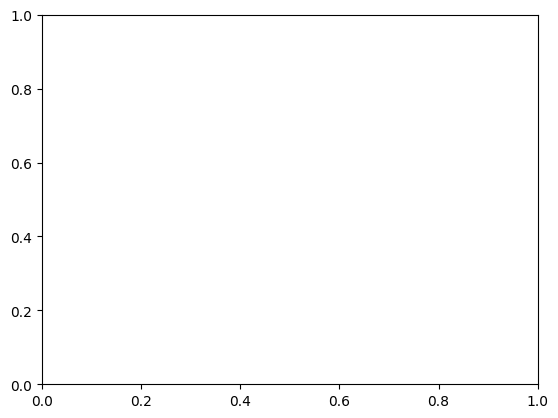

In [ ]:
# line 1 points
# plotting the line 1 points
import matplotlib.pyplot as plt
plt.plot( list2,list, label = "Actual value",color='red')
plt.plot(list2, list1, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn. metrics import r2_score
from sklearn.metrics import mean_absolute_error
reg=MLPRegressor(random_state=1,max_iter=1000)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#mse
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
# r2 score
res=r2_score(y_test,y_pred)
print(res)
# mae
mae=mean_absolute_error(y_test, y_pred)
print(mae)

ValueError: Found array with dim 3. MLPRegressor expected <= 2.

In [ ]:
#decision tree regessor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn. metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dtr=DecisionTreeRegressor(random_state = 0,min_samples_leaf=20)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
#mse
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
# r2 score
res=r2_score(y_test,y_pred)
print(res)
# mae
mae=mean_absolute_error(y_test, y_pred)
print(mae)


In [ ]:
# svm
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
rms = mean_squared_error(y_test, y_pred)
print(rms)
res=r2_score(y_test,y_pred)
print(res)
mae=mean_absolute_error(y_test, y_pred)
print(mae)

ValueError: Found array with dim 3. SVR expected <= 2.

In [ ]:
#linearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rms = mean_squared_error(y_test, y_pred)
print(rms)
res=r2_score(y_test,y_pred)
print(res)
mae=mean_absolute_error(y_test, y_pred)
print(mae)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
attribute=X.to_numpy()
label=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(attribute, label, test_size=0.2, random_state=0)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(12497, 4, 1)
(12497,)


In [ ]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (4,1)))
regressor.add(Dense(128))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 10)
y_pre=regressor.predict(X_test)
#y_pre=y_pre.flatten()
print(len(y_pre))
print(len(y_test))

Epoch 1/10
391/391 [==============================] - 6s 7ms/step - loss: 0.0234
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 0.0023
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 0.0013
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 9.9157e-04
Epoch 5/10
391/391 [==============================] - 3s 9ms/step - loss: 8.0727e-04
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 6.0519e-04
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 4.4592e-04
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 2.7819e-04
Epoch 9/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5446e-04
Epoch 10/10
98/98 [==============================] - 1s 4ms/step
3125
3125


In [ ]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (4,1)))
regressor.add(Dense(128))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
regressor.fit(X_train, y_train, epochs = 10)
y_pre=regressor.predict(X_test)

Epoch 1/10
391/391 [==============================] - 5s 5ms/step - loss: 0.0835
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 0.0337
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0238
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 0.0195
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 0.0162
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.0146
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 0.0133
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 0.0126
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0122
Epoch 10/10
98/98 [==============================] - 1s 4ms/step


In [ ]:

regressor = Sequential()
regressor.add(LSTM(100, input_shape = (4,1)))
regressor.add(Dense(128))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_percentage_error')
regressor.fit(X_train, y_train, epochs = 10)
y_pre=regressor.predict(X_test)

Epoch 1/10
391/391 [==============================] - 5s 6ms/step - loss: 15.7942
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 5.7678
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 4.3632
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 3.6603
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 3.0701
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 2.7955
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 2.7550
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 2.5558
Epoch 9/10
391/391 [==============================] - 2s 6ms/step - loss: 2.3065
Epoch 10/10
98/98 [==============================] - 1s 4ms/step


In [ ]:
scores = regressor.evaluate(X_test, y_test, verbose=0)
print(scores)

9208.0224609375


In [ ]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (4,1)))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
regressor.fit(X_train, y_train, epochs = 5)
y_pre=regressor.predict(X_test,verbose=0)
print(y_pre)

Epoch 1/5
391/391 [==============================] - 5s 6ms/step - loss: 0.0592
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 0.0181
Epoch 3/5
391/391 [==============================] - 2s 6ms/step - loss: 0.0149
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 0.0134
Epoch 5/5
391/391 [==============================] - 3s 7ms/step - loss: 0.0115
[[0.5198251 ]
 [0.35132295]
 [0.30125734]
 ...
 [0.8481045 ]
 [0.7188941 ]
 [0.37717652]]


In [ ]:
list1=[]
for i in range(30):
    list1.append(y_pre[i].tolist())
print(np.vstack(list1))

[[0.5198251 ]
 [0.35132295]
 [0.30125734]
 [0.37685579]
 [0.52123499]
 [0.68032837]
 [0.77905929]
 [0.6916756 ]
 [0.94128019]
 [0.61182863]
 [0.26931745]
 [0.45291117]
 [0.59405059]
 [0.5593316 ]
 [0.44794443]
 [0.34601089]
 [0.43311486]
 [0.86983573]
 [0.42390758]
 [0.69351548]
 [0.34523028]
 [0.72652173]
 [0.72437257]
 [0.92429793]
 [0.45097655]
 [0.41517314]
 [0.35271516]
 [0.48849016]
 [0.3716161 ]
 [0.8807441 ]]


In [ ]:
list=[]
for i in range(30):
    list.append(y_test[i])
print(list)

[0.5274725274725275, 0.35714285714285715, 0.30219780219780223, 0.3791208791208791, 0.5247252747252747, 0.6703296703296704, 0.7747252747252746, 0.6895604395604396, 0.934065934065934, 0.6071428571428572, 0.26373626373626374, 0.46703296703296704, 0.5851648351648352, 0.5659340659340659, 0.45604395604395603, 0.3434065934065934, 0.43956043956043955, 0.8626373626373627, 0.44505494505494503, 0.6923076923076923, 0.34065934065934067, 0.717032967032967, 0.7142857142857143, 0.9175824175824177, 0.44505494505494503, 0.35714285714285715, 0.35714285714285715, 0.39285714285714285, 0.3626373626373626, 0.6923076923076923]


In [ ]:
list2=[]
for j in range(30):
    list2.append(j)
print(list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


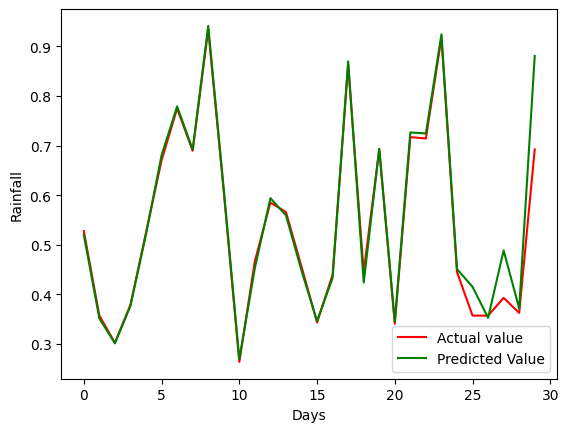

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
# plotting the line 1 points
plt.plot( list2,list, label = "Actual value",color='red')
plt.plot(list2, list1, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

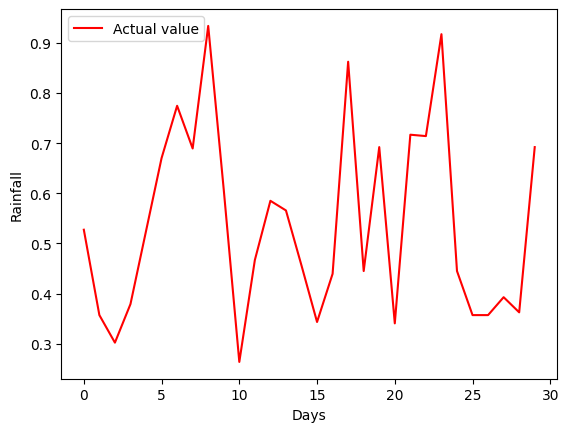

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
# plotting the line 1 points
#plt.plot(list2, list1, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points
plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


In [ ]:
res=r2_score(y_test,y_pre)
print(res)

0.9879424395366955


In [ ]:
rms = np.sqrt(mean_squared_error(y_test, y_pre))
print(rms)

0.02074892973224949


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pre)
print(mae)

0.009213979017806576


In [ ]:
list1=[]
for i in range(24,30):
    list1.append(y_pred[i].tolist())
print(np.vstack(list1))

[[0.44322344]
 [0.35531136]
 [0.35531136]
 [0.36630037]
 [0.36630037]
 [0.68223443]]


ValueError: x and y must have same first dimension, but have shapes (6,) and (30,)

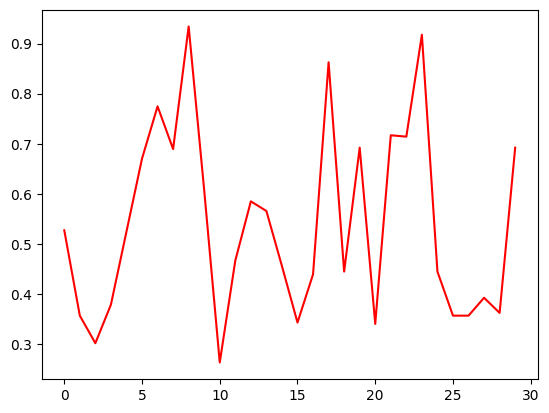

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
# plotting the line 1 points
plt.plot( list2,list, label = "Actual value",color='red')
plt.plot(list1, list, label = "Predicted Value", color='green')
# line 2 points
# plotting the line 2 points
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Days')
# Set the y axis label of the current axis.
plt.ylabel('Rainfall')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
